### Import Keras module that will be used later for our computation and save a few useful constants

In [20]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense
from keras import optimizers
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
img_width, img_height = 256, 256
batch_size=16
epochs=50
train_data_dir='/media/dheeraj/9A26F0CB26F0AA01/WORK/jupyter_files/dogs-vs-cats/train'
test_data_dir='/media/dheeraj/9A26F0CB26F0AA01/WORK/jupyter_files/dogs-vs-cats/test'
#OUT Categories
out_categories=1

#number of train, test samples
num_train_samples=25000
#num_test_samples=



### Load the pretrained model on the imagenet VGG16 network and omit the last layer because we will add custom classification network on the top of the prebuilt VGG16 and replace the last classification layer

In [4]:
#load the VGG16 model pretrained on imagenet
base_model=applications.VGG16(weights="imagenet", 
                              include_top=False, input_shape=(img_width, img_height, 3))
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

### Freez the last 15 lowest layers for the pretrained VGG16 network.

In [5]:
for layer in base_model.layers[:15]:
    layer.trainable=False

### Add a custom set of top layers for classification

In [12]:
top_model=Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(out_categories, activation='sigmoid'))

In [14]:
data="/media/dheeraj/9A26F0CB26F0AA01/WORK/jupyter_files/kagglecatsanddogs_3367a/PetImages"
Categories=["Dog", "Cat"]

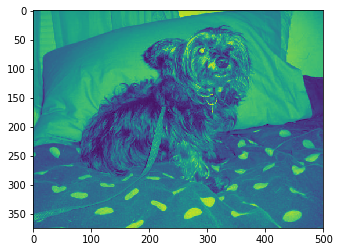

In [21]:
#config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)

for category in Categories:
    
     # here we need to join the path of the directories of dogs and cats together
    path=os.path.join(data, category)
    
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE ) #converting the photo to greyscale
        plt.imshow(img_array)
        plt.show()
        break
    break

In [22]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [23]:
print(img_array.shape)

(375, 500)


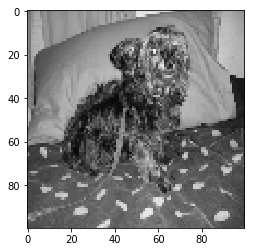

In [24]:
img_size= 100

new_images=cv2.resize(img_array, (img_size, img_size), cv2.IMREAD_GRAYSCALE)  # size of image is 100*100
plt.imshow(new_images, cmap='gray')
plt.show()

In [ ]:
training_data=[]
def create_training_data():
    for category in Categories:
    
        # here we need to join the path of the directories of dogs and cats together
        path=os.path.join(data, category)

        #here we create catogories for the classes for comparison
        class_num=Categories.index(category)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path, img))  
                new_images=cv2.resize(img_array, (img_size, img_size))  # size of image is 100*100
                training_data.append([new_images, class_num])
                #print(class_num)
            except Exception as e:
                pass

create_training_data()      
print(training_data[0])